# Solution 1: SMOTE

Description_1: Sử dụng SMote  để tăng số lượng mẫu "KO CÓ" từ 24 thành 120 mẫu, sử dụng cho
model phân loại 123 classes PRESS DATA

NOTE:
df_org is original dataset pressure;
df_aug is SMOTE 120 samples each node JUNC
df_aug2 is SMOTE 14640 samples each 0 (no leak) and 1 (leak)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import pandas as pd

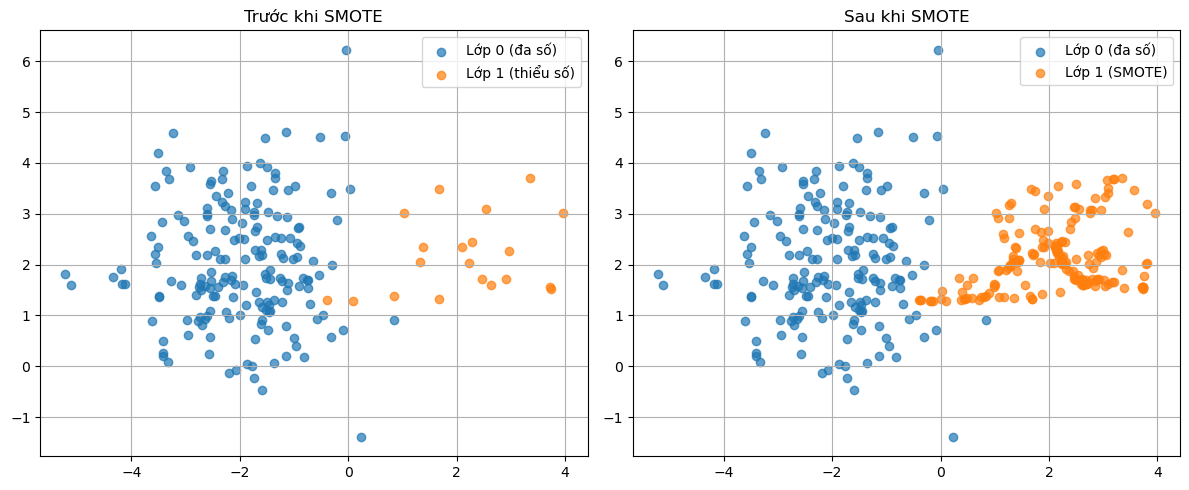

In [ ]:
'''Ví dụ dummy data'''
# Tạo dữ liệu mất cân bằng
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1],
                           n_informative=2, n_redundant=0,
                           n_features=2, n_clusters_per_class=1,
                           n_samples=200, random_state=42)

# Vẽ trước khi SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Trước khi SMOTE")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Lớp 0 (đa số)", alpha=0.7)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Lớp 1 (thiểu số)", alpha=0.7)
plt.legend()
plt.grid(True)

# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Vẽ sau khi SMOTE
plt.subplot(1, 2, 2)
plt.title("Sau khi SMOTE")
plt.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label="Lớp 0 (đa số)", alpha=0.7)
plt.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label="Lớp 1 (SMOTE)", alpha=0.7)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
#đọc data th duc
df_org = pd.read_csv("E:/LeakDectect/LeakageDetectionInWDN/Data_thDuc/Duc_Pressure_Data.csv")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Tách đặc trưng và nhãn
X = df_org.loc[:, df_org.columns.str.startswith(("JUNC", "LƯU","HỆ")) ]
y = df_org["KỊCH BẢN RÒ RỈ TẠI NÚT"]

# SMOTE để tăng số lượng mẫu lớp "KO CÓ" từ 24 lên 120
smote = SMOTE(sampling_strategy={"KO CÓ": 120}, k_neighbors=1, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Tạo DataFrame mới
df_augmented = pd.DataFrame(X_res, columns=X.columns)
df_augmented.insert(0, "KỊCH BẢN RÒ RỈ TẠI NÚT", y_res)

# Lưu lại nếu cần
df_augmented.to_csv("balanced_pressure_data.csv", index=False)
df_aug = pd.read_csv("balanced_pressure_data.csv")
df_aug.head(1)

C:\Users\ainzo\AppData\Local\Temp\ipykernel_10652\544327401.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_augmented.insert(0, "KỊCH BẢN RÒ RỈ TẠI NÚT", y_res)


,KỊCH BẢN RÒ RỈ TẠI NÚT,LƯU LƯỢNG RÒ RỈ,HỆ SỐ PATTERN,JUNC 1,JUNC 2,JUNC 3,JUNC 4,JUNC 5,JUNC 6,JUNC 7,...,JUNC 113,JUNC 114,JUNC 115,JUNC 116,JUNC 117,JUNC 118,JUNC 119,JUNC 120,JUNC 121,JUNC 122
0,KO CÓ,0,0.05,-21.74416,-29.240788,-30.660376,-31.138836,-31.70402,-30.649727,-30.15181,...,-30.732382,-30.089029,-27.776649,-24.45055,-23.146145,-29.136051,-28.004761,-26.81476,-24.131359,-29.702162


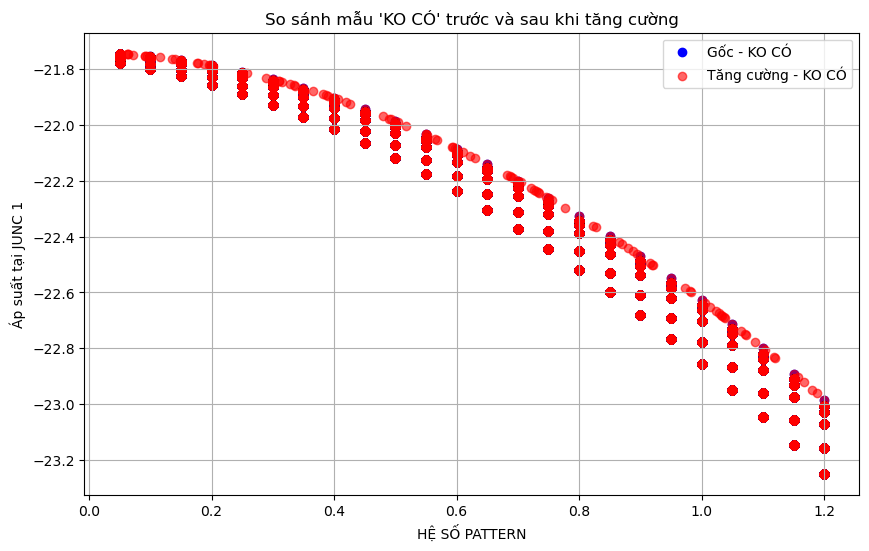

In [12]:
# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6))
plt.scatter(df_org["HỆ SỐ PATTERN"], df_org["JUNC 1"], color="blue", label="Gốc - KO CÓ")
plt.scatter(df_aug["HỆ SỐ PATTERN"], df_aug["JUNC 1"], color="red", label="Tăng cường - KO CÓ", alpha=0.6)
plt.xlabel("HỆ SỐ PATTERN")
plt.ylabel("Áp suất tại JUNC 1")
plt.title("So sánh mẫu 'KO CÓ' trước và sau khi tăng cường")
plt.legend()
plt.grid(True)
plt.show()

Description_2: Sử dụng Smote để tăng số lượng mẫu từ 24 thành 14640 sử dụng cho model 
phân loại 0 - 1 (Binary Classification) PRESS DATA

In [ ]:
#đọc data th duc
df_org = pd.read_csv("E:/LeakDectect/LeakageDetectionInWDN/Data_thDuc/Duc_Pressure_Data.csv")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Tách đặc trưng và nhãn
X = df_org.loc[:, df_org.columns.str.startswith(("JUNC", "LƯU","HỆ")) ]
y = df_org["KỊCH BẢN RÒ RỈ TẠI NÚT"]

# SMOTE để tăng số lượng mẫu lớp "KO CÓ" từ 24 lên 120
smote = SMOTE(sampling_strategy={"KO CÓ": 120}, k_neighbors=1, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Tạo DataFrame mới
df_augmented = pd.DataFrame(X_res, columns=X.columns)
df_augmented.insert(0, "KỊCH BẢN RÒ RỈ TẠI NÚT", y_res)

# Lưu lại nếu cần
df_augmented.to_csv("balanced_pressure_data2.csv", index=False)
df_aug2 = pd.read_csv("balanced_pressure_data2.csv")
df_aug2.head(1)

## Binary Classification

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
# df = pd.read_csv("/content/balanced_pressure_data.csv")
df_aug2['Leak'] = np.where(df_aug2["KỊCH BẢN RÒ RỈ TẠI NÚT"] == "KO CÓ", 0, 1)
x = df_aug2.drop(['Leak',"KỊCH BẢN RÒ RỈ TẠI NÚT"], axis=1)
y = df_aug2['Leak']
y.value_counts()
x.head(2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
# Split the data into training and testing sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lo = LogisticRegression()
lo.fit(x_train_val, y_train_val)

# Evaluate the model
score = lo.score(x_test, y_test)
print(f"Accuracy: {score}")
y_pred = lo.predict(x_test)
# Create the confusion matrix
cm_lo = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm_lo).plot()b

In [ ]:
from scipy.stats import randint
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train_val, y_train_val)
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
# Generate predictions with the best model
y_pred = best_rf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Solution 2: Boosting forest

Boosting forest is used in the imbalance data, it doesn't need increasing minority in data. Just use the data original

In [ ]:
'''This example using the imbalanced data in the binary case, 0 is no leak, 1 is leak and we
have 120 samples for 0 and 14640 samples for 1, if we want to explore more, we can use 
df_org for this example'''
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
df_aug['Leak'] = np.where(df_aug["KỊCH BẢN RÒ RỈ TẠI NÚT"] == "KO CÓ", 0, 1)
X = df_aug.drop(['Leak',"KỊCH BẢN RÒ RỈ TẠI NÚT"], axis=1)
y = df_aug['Leak']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
rf_classifier.fit(X_train, y_train)

# Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100)
gb_classifier.fit(X_train, y_train)

rf_classifier.score(X_test, y_test)
gb_classifier.score(X_test, y_test)